In [1]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:\Users\Sush\Desktop\Data_Mart\Train.csv')

test = pd.read_csv(r'C:\Users\Sush\Desktop\Data_Mart\Test.csv')

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lreg = LinearRegression()

In [8]:
# see for two variables
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [9]:
X.head()

Outlet_Establishment_Year  Item_MRP
0                       1999  249.8092
1                       2009   48.2692
2                       1999  141.6180
3                       1998  182.0950
4                       1987   53.8614

In [10]:
#splitting into training and cv for cross validation
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [11]:
#training the model
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#predicting on cv
pred = lreg.predict(x_cv)

In [13]:
#calculating mse

mse = np.mean((pred - y_cv)**2)

In [14]:
print(mse)

2077461.3502727444


In [15]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

0  Coefficient Estimate
0  Outlet_Establishment_Year            -10.034811
1                   Item_MRP             15.637469

In [16]:
# R-Score
lreg.score(x_cv,y_cv)

0.30396315254845563

In [17]:
#Introducing another factor for regressing 

X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]


In [18]:

#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)



In [19]:
#It produces an error, because item weights column have some missing values. So let us impute it with the mean of other non-null entries.
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [21]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [30]:
# For both x_train and x_cv
x_cv.replace([np.inf, -np.inf], np.nan)


Outlet_Establishment_Year  Item_MRP  Item_Weight
2036                       2004  173.5738       16.600
7286                       1987   60.1536        6.130
1212                       2007  153.3314       19.200
3091                       2002  190.8162       16.750
1224                       1998  121.4098        6.590
4301                       2007   99.6700        8.985
2128                       2004  165.8500        5.655
3943                       1999  158.0604       18.000
4505                       2002  158.9604        9.695
6707                       2004  197.0794       20.250
7852                       1999   94.9752       20.200
2208                       1985  102.7332          NaN
5832                       1998  193.3162       12.300
1415                       2002  255.9330       18.850
6602                       2002  148.2392        8.210
5750                       2009  196.1794       20.250
8159                       2009  158.9288       18.100
5564                       2004   63.5852        6.920
3485                       1997   50.6666       10.895
6562                       2009  216.8850       16.700
2635                       1985  166.1842          NaN
8471                       2007  163.0526        5.400
7599                       1998  165.3158        9.600
3598                       1985   54.5956          NaN
3665                       2007   59.3536       20.100
6676                       1985   63.9168          NaN
2082                       1999  187.6556        8.750
6252                       1987  198.8084        4.920
6970                       1997   74.0696       16.200
2241                       1997   65.8142        6.710
...                         ...       ...          ...
6898                       1987  228.5668       14.100
7979                       1999  197.2742       12.500
6030                       2004  124.6362        9.100
6741                       2004  108.2280        7.000
7870                       1987  165.1526       11.100
7401                       1999   57.1904       18.200
3584                       2002  226.9694       15.000
4836                       2007  143.1154       10.195
5525                       2004   35.1216       17.750
5535                       2009  190.1872       12.150
5007                       2004  122.6756        8.655
6818                       2002  233.0642        9.895
7585                       1985   51.2350          NaN
6269                       1985  158.9604          NaN
3312                       1999  132.2942       15.700
3265                       1987  238.7248       15.200
7458                       1997   48.3034       17.700
918                        1985   98.2042          NaN
5915                       2004  139.7838        5.095
467                        2007   88.7830       10.500
7542                       1987   79.8644        9.195
5817                       1999   35.8848       15.200
2892                       1999   98.4384        7.270
6306                       1987  129.1678       20.200
5099                       2009   94.7410        8.645
7769                       2009   58.9246       12.350
4780                       1998  194.8794       10.895
6182                       2004  129.3994       18.000
3966                       1997  125.8046       16.250
5335                       2007   35.1558       16.100

[2131 rows x 3 columns]

In [31]:
# For both y_train and y_cv
y_cv.replace([np.inf, -np.inf], np.nan)

2036    1911.5118
7286    1102.5648
1212    3257.7594
3091    2886.2430
1224     241.0196
4301    3295.7100
2128    1830.9500
3943    3327.6684
4505    1743.0644
6707    4681.9056
7852    1342.2528
2208     410.1328
5832     192.4162
1415    3844.9950
6602    1491.3920
5750    2731.1116
8159    1571.2880
5564     751.0224
3485     666.4658
6562    6275.1650
2635    5470.8786
8471    2302.3364
7599     334.2316
3598     218.3824
3665     918.8040
6676    1597.9200
2082    5257.1568
6252    2976.1260
6970    1416.8224
2241     856.8846
          ...    
6898    1151.8340
7979    3782.4098
6030    2390.8878
6741    1171.8080
7870    1480.0734
7401    1640.5312
3584    6851.0820
4836    2410.8618
5525     830.9184
5535    3781.7440
5007    2302.3364
6818    6041.4692
7585      49.9350
6269    4436.8912
3312    2252.4014
3265    1659.1736
7458     777.6544
918      198.4084
5915    1264.3542
467     2067.3090
7542     785.6440
5817     596.5568
2892    1576.6144
6306    1017.3424
5099    10

In [32]:
# For both x_train and x_cv
x_cv = x_cv.groupby(x_cv.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))


In [33]:
# For both y_train and y_cv
y_cv = y_cv.groupby(y_cv).transform(lambda x: x.fillna(x.mean()))


In [28]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
pred = lreg.predict(x_cv)

In [35]:
mse = np.mean((pred - y_cv)**2)
print(mse)

1944552.982677451


In [36]:
coeff = DataFrame(x_train.columns)

In [37]:
coeff.head()

0
0  Outlet_Establishment_Year
1                   Item_MRP
2                Item_Weight

In [38]:
coeff['Coefficient Estimate'] = Series(lreg.coef_)

In [39]:
coeff

0  Coefficient Estimate
0  Outlet_Establishment_Year            -11.702036
1                   Item_MRP             15.594749
2                Item_Weight             -2.396088

In [40]:
lreg.score(x_cv,y_cv) 

0.31683867552685718

In [97]:
#Data pre-processing steps for regression model

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [98]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [99]:
test.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [100]:
# creating dummy variables to convert categorical into numeric values
# for object types
mylist = list(train.select_dtypes(include=['object']).columns)

In [101]:
#For categories variables
dummies.shape



(8523, 1600)

In [102]:
train.drop(mylist, axis=1, inplace = True)

In [103]:
X = pd.concat([train,dummies], axis =1 )

In [104]:
X.shape

(8523, 1605)

In [105]:
import matplotlib.pyplot as plt

%matplotlib inline

In [106]:
lreg = LinearRegression()



In [107]:
from sklearn.model_selection import train_test_split

X = train.drop('Item_Outlet_Sales',1)
X.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0         9.30         0.016047  249.8092                       1999
1         5.92         0.019278   48.2692                       2009
2        17.50         0.016760  141.6180                       1999
3        19.20         0.066132  182.0950                       1998
4         8.93         0.066132   53.8614                       1987

In [108]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3)



In [109]:
# training a linear regression model on train

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
# predicting on cv

pred_cv = lreg.predict(x_cv)

In [111]:
x_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
5137    17.750000         0.030631  178.5660                       2009
1952    13.650000         0.025973   79.6302                       2002
7747    12.857645         0.158425   62.4194                       1985
754      6.280000         0.027700   87.9198                       2004
598     12.857645         0.053795  117.7466                       1985

In [112]:
# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1777839.2650085897

In [113]:
# evaluation using r-square

lreg.score(x_cv,y_cv)


0.34022841819433502

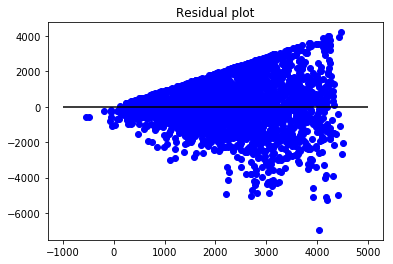

In [114]:
#residual plot

x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [115]:
predictors = x_train.columns



In [116]:
coef = Series(lreg.coef_,predictors).sort_values()



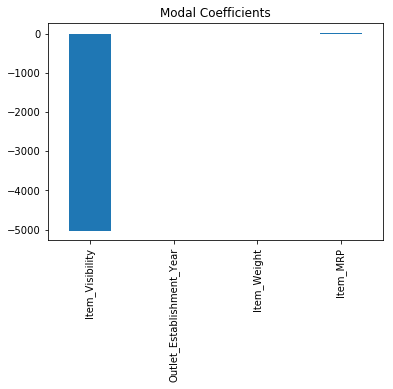

In [117]:
#Item Visiblity drives sales
coef.plot(kind='bar', title='Modal Coefficients')

In [118]:
from sklearn.linear_model import Ridge



In [119]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

In [120]:
ridgeReg.fit(x_train,y_train)



Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [121]:
pred = ridgeReg.predict(x_cv)

In [122]:
#calculating mse

mse = np.mean((pred_cv - y_cv)**2)

In [123]:
mse

1777839.2650085897

In [125]:
## calculating score 
ridgeReg.score(x_cv,y_cv)

0.34157144591132976